# Teste SpaceTime Labs

----

## Questão 1

In [1]:
def conta_ruas_lockdown(N, A, B):
    j=0
    for i in range(N+1)[1:]:
        j = (j+1) if any([i%A ==0,i%B == 0]) else j
    return j

In [2]:
print(conta_ruas_lockdown(10, 2, 3))
print(conta_ruas_lockdown(50, 5, 7))
print(conta_ruas_lockdown(1000000, 28, 32))

7
16
62500


------

## Questão 2

**Descrição do dataset**:

* bloco: identificador da região de plantação e colheita de cana de açúcar
* talhao: identificador da sub-região de plantação e colheita de cana de açúcar (um bloco contém vários
talhões)
* safra: ano que a cana de açúcar foi colhida
* area: tamanho da área colhida em hectares
* data_colheita: data em que a cana de açúcar foi colhida
* tch_bloco: Toneladas de Cana por Hectare colhida referente ao bloco
* NDVI_b01: NDVI (Normalized De Vegetation Index), e o “b01” corresponde ao índice médio relativo ao primeiro mês antes da colheita
* NDVI_bN: NDVI médio relativo ao N-ésimo mês antes da colheita

**Objetivo do projeto**: Desenvolver um modelo capaz de prever o TCH dos blocos do dataset para a safra de 2021.

### Importação dos dados

In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_rows', 115)

In [59]:
df = pd.read_csv(r'/Users/leuzinger/Dropbox/Data Science/Case SpaceTime Labs/dataset_case_DS.csv')

In [25]:
df.head()

,Unnamed: 0,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
0,0,1239,1,2015,15.53,2015-10-25 00:00:00,75.88,0.622972,NaN,0.712402,0.693089,0.743105,0.805768,0.711357,0.767734,0.650449,NaN,0.241302,NaN
1,1,1243,1,2015,13.69,2015-07-14 00:00:00,65.22,0.677335,NaN,0.651432,NaN,0.721786,0.641068,NaN,0.337117,0.323262,0.289830,0.279747,0.262570
2,2,1243,2,2015,4.63,2015-07-15 00:00:00,65.22,0.632256,NaN,0.736531,0.560717,0.682829,0.582140,NaN,0.317600,0.298278,NaN,NaN,NaN
3,3,1243,7,2015,4.95,2015-07-16 00:00:00,65.22,0.570271,0.463221,0.702480,0.590163,0.664030,0.602534,NaN,0.386727,0.321662,NaN,NaN,NaN
4,4,1244,4,2015,8.66,2015-05-13 00:00:00,96.91,0.709576,0.454723,0.734945,0.722006,NaN,0.494456,0.401426,0.364672,0.367147,0.387163,0.452122,0.516717


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19870 entries, 0 to 19869
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     19870 non-null  int64  
 1   bloco          19870 non-null  int64  
 2   talhao         19870 non-null  int64  
 3   safra          19870 non-null  int64  
 4   area           16330 non-null  float64
 5   data_colheita  19755 non-null  object 
 6   tch_bloco      19838 non-null  float64
 7   NDVI_b01       18949 non-null  float64
 8   NDVI_b02       18829 non-null  float64
 9   NDVI_b03       18290 non-null  float64
 10  NDVI_b04       17487 non-null  float64
 11  NDVI_b05       16307 non-null  float64
 12  NDVI_b06       16422 non-null  float64
 13  NDVI_b07       16337 non-null  float64
 14  NDVI_b08       15798 non-null  float64
 15  NDVI_b09       15120 non-null  float64
 16  NDVI_b10       14647 non-null  float64
 17  NDVI_b11       13008 non-null  float64
 18  NDVI_b

In [60]:
df = df.drop('Unnamed: 0',axis=1)
df['data_colheita'] = pd.to_datetime(df['data_colheita'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19870 entries, 0 to 19869
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   bloco          19870 non-null  int64         
 1   talhao         19870 non-null  int64         
 2   safra          19870 non-null  int64         
 3   area           16330 non-null  float64       
 4   data_colheita  19755 non-null  datetime64[ns]
 5   tch_bloco      19838 non-null  float64       
 6   NDVI_b01       18949 non-null  float64       
 7   NDVI_b02       18829 non-null  float64       
 8   NDVI_b03       18290 non-null  float64       
 9   NDVI_b04       17487 non-null  float64       
 10  NDVI_b05       16307 non-null  float64       
 11  NDVI_b06       16422 non-null  float64       
 12  NDVI_b07       16337 non-null  float64       
 13  NDVI_b08       15798 non-null  float64       
 14  NDVI_b09       15120 non-null  float64       
 15  NDVI_b10       1464

In [28]:
df.head()

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
0,1239,1,2015,15.53,2015-10-25,75.88,0.622972,NaN,0.712402,0.693089,0.743105,0.805768,0.711357,0.767734,0.650449,NaN,0.241302,NaN
1,1243,1,2015,13.69,2015-07-14,65.22,0.677335,NaN,0.651432,NaN,0.721786,0.641068,NaN,0.337117,0.323262,0.289830,0.279747,0.262570
2,1243,2,2015,4.63,2015-07-15,65.22,0.632256,NaN,0.736531,0.560717,0.682829,0.582140,NaN,0.317600,0.298278,NaN,NaN,NaN
3,1243,7,2015,4.95,2015-07-16,65.22,0.570271,0.463221,0.702480,0.590163,0.664030,0.602534,NaN,0.386727,0.321662,NaN,NaN,NaN
4,1244,4,2015,8.66,2015-05-13,96.91,0.709576,0.454723,0.734945,0.722006,NaN,0.494456,0.401426,0.364672,0.367147,0.387163,0.452122,0.516717


### Limpeza dos dados

Verificamos que o dataset tem muitos valores em branco. Antes de decidir o que fazer com estes valores, é preciso examiná-los

In [29]:
df.isnull().sum()

bloco               0
talhao              0
safra               0
area             3540
data_colheita     115
tch_bloco          32
NDVI_b01          921
NDVI_b02         1041
NDVI_b03         1580
NDVI_b04         2383
NDVI_b05         3563
NDVI_b06         3448
NDVI_b07         3533
NDVI_b08         4072
NDVI_b09         4750
NDVI_b10         5223
NDVI_b11         6862
NDVI_b12         8242
dtype: int64

In [30]:
lista = df[(df.area.isnull()==True)]['bloco'].unique()
df[df.bloco.isin(lista)].sort_values(['bloco','talhao'])[:10]

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
4643,1236,1,2016,6.43,2016-07-12,101.68,0.660357,0.712407,0.682959,NaN,0.378934,NaN,NaN,0.432385,0.589786,0.564760,NaN,NaN
8080,1236,1,2017,6.43,2017-07-23,86.43,0.359089,0.683225,0.570371,0.722969,0.792568,NaN,NaN,NaN,0.589414,0.467347,0.446032,0.297526
11419,1236,1,2018,6.22,2018-07-27,60.10,0.509706,0.553962,0.648584,0.738972,0.792210,0.780096,NaN,0.656676,0.438491,0.348275,0.286659,0.285387
14748,1236,1,2019,6.43,2019-07-12,69.18,0.641126,0.699486,0.750493,0.690155,0.746051,0.662154,0.673212,0.534159,0.342282,0.267040,0.257505,NaN
16445,1236,1,2020,NaN,2020-10-04,51.90,0.384249,NaN,0.479729,0.564533,0.629845,0.717385,0.729278,NaN,0.660739,NaN,0.460468,0.383685
3800,1236,2,2016,3.42,2016-07-06,101.68,0.628659,0.628896,0.617167,0.527482,0.611054,NaN,NaN,0.371698,0.383678,0.318137,NaN,NaN
7207,1236,2,2017,3.42,2017-11-10,86.43,0.423355,0.425829,0.460654,0.487857,0.530614,0.552597,0.587656,0.648282,NaN,0.549427,NaN,NaN
10616,1236,2,2018,3.42,2018-07-25,60.10,0.479539,0.412658,0.575260,0.624209,0.661809,0.597908,NaN,0.315461,NaN,NaN,NaN,NaN
13917,1236,2,2019,3.42,2019-07-11,69.18,0.555392,0.616084,0.650106,0.632419,0.631893,0.557860,0.563994,0.446160,0.328467,0.301652,0.289698,NaN
16446,1236,2,2020,NaN,2020-11-05,51.90,0.167690,0.357762,0.373363,0.407766,0.482634,0.481337,0.547575,0.539551,0.591749,0.538537,NaN,0.381633


In [31]:
lista = df[(df.data_colheita.isnull()==True)]['bloco'].unique()
df[df.bloco.isin(lista)].sort_values(['bloco','talhao'])[:10]

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
3393,1318,1,2016,7.86,2016-10-24,46.46,0.541005,NaN,0.543375,0.624938,0.664672,0.619579,0.650427,0.587982,0.635573,NaN,NaN,NaN
10225,1318,1,2018,6.46,2018-07-08,139.39,0.667255,0.714403,0.753384,0.756028,0.673907,0.739257,0.581891,0.662200,0.611078,0.608620,0.677862,0.672090
13463,1318,1,2019,NaN,NaT,94.25,0.733818,0.742121,0.750504,0.709293,0.692059,NaN,0.504185,0.371439,0.320846,0.299756,NaN,NaN
16565,1318,1,2020,NaN,2020-10-22,84.50,0.408857,0.396095,0.472941,0.490616,0.529498,0.558046,0.633011,0.707958,NaN,0.671246,NaN,0.448816
3819,1318,2,2016,2.51,2016-10-22,46.46,0.538544,NaN,0.588504,0.621241,0.671270,0.608038,0.652931,0.641752,0.399441,NaN,NaN,NaN
12202,1318,2,2018,7.81,2018-07-08,139.39,0.696029,0.733771,0.766465,0.766945,0.662892,0.757443,0.523213,0.649017,0.603544,0.616227,0.680219,0.667862
15630,1318,2,2019,NaN,NaT,94.25,0.712241,0.745143,0.734060,0.681058,0.668439,NaN,0.511120,0.361319,0.314161,0.285863,NaN,NaN
16566,1318,2,2020,NaN,2020-10-18,84.50,0.409168,0.398943,0.473986,0.536752,0.517132,0.655842,0.694097,0.741326,NaN,0.684743,NaN,0.471911
5891,1318,3,2016,4.03,2016-10-24,46.46,0.520981,NaN,0.542252,0.590789,0.663539,0.579616,0.657354,0.563013,0.426595,NaN,NaN,NaN
10226,1318,3,2018,5.30,2018-07-09,139.39,0.682254,0.724838,0.766900,0.774900,0.668060,0.750179,0.496373,0.604408,0.532426,0.561839,0.633349,0.619208


In [32]:
lista = df[(df.tch_bloco.isnull()==True)]['bloco'].unique()
df[df.bloco.isin(lista)].sort_values(['bloco','talhao'])[:10]

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
1515,1357,1,2015,8.64,2015-06-12,104.28,0.560011,0.723784,NaN,0.753860,0.739095,0.574669,0.465178,0.442331,0.425564,0.509961,0.473171,0.465006
4660,1357,1,2016,8.92,2016-07-25,80.75,0.645183,0.689671,0.671252,0.711323,NaN,0.521723,NaN,NaN,NaN,0.459200,0.401939,0.328257
8108,1357,1,2017,8.92,2017-09-17,61.97,0.561801,0.605856,0.715280,0.694626,0.645020,0.714974,0.676409,0.754707,0.594936,0.512324,0.476257,0.339432
14771,1357,1,2019,NaN,NaT,NaN,NaN,0.448475,NaN,0.734450,NaN,0.663825,0.395827,0.371531,0.377227,0.457353,0.474648,0.508572
16646,1357,1,2020,NaN,2020-08-23,92.70,0.534981,0.629003,0.694800,0.778286,0.765914,0.787156,0.662749,NaN,NaN,0.501623,0.468881,0.499989
27,1357,2,2015,12.53,2015-06-12,104.28,0.606405,0.730581,NaN,0.770099,0.759300,0.537352,0.494894,0.480092,0.470438,0.540441,0.510380,0.500675
2950,1357,2,2016,13.89,2016-07-23,80.75,0.669249,0.708285,0.694450,0.728916,NaN,0.530665,NaN,NaN,NaN,0.482191,0.422526,0.351897
6310,1357,2,2017,13.89,2017-09-17,61.97,0.600781,0.637149,0.733459,0.698046,0.657977,0.737303,0.705674,0.764149,0.597411,0.527565,0.492013,0.366543
13068,1357,2,2019,NaN,NaT,NaN,NaN,0.507056,NaN,0.750507,NaN,0.679439,0.421968,0.407366,0.409763,0.478562,0.497599,0.529751
16647,1357,2,2020,NaN,2020-08-24,92.70,0.569449,0.650422,0.708424,0.780500,0.763065,0.792830,0.709250,NaN,NaN,0.556282,0.494241,0.511743


-------

Para o caso da data da colheita e do tch_bloco, não seria interessante tentar estimar os valores para as poucas linhas do dataset que estão sem valor. Nestes casos, é melhor remover estas linhas do dataset. **Vamos considerar que este tipo de linha é um erro no dataset, pois não são significativos para nossa análise e representam apenas 0,6% dos dados**.

Após excluir essas linhas, verificamos que todos os valores em branco referentes à variável 'área' são do ano de 2020. Mais importante ainda, não temos nenhum valor de área para 2020. **O problema é que sem a área do talhão, não é possível estabelecer uma relação entre os valores que estão definidos para o talhão (área, data da colheita e NDVI) e o valor da colheita que está calculada para o bloco**.

Se a área colhida fosse sempre a mesma em cada talhão ou em cada bloco, bastaria adotar esse valor. Contudo, não é esse o caso. Uma possível solução seria utilizar imputações estatítisticas ou o [KNN imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)) para estimar esse dado de área faltante. **Outra solução possível é usarmos os dados de 2020 como dados de teste e trabalhar os dados de treino para tornar o modelo independente desse dado da área. É essa a estratégia que adotaremos**.

Por isso, já dividiremos o dataset em dados de treino e de teste e faremos as adequações necessárias nos dados de treino. 

Quanto aos valores em branco de NDVI para depois, decidiremos o que fazer após realizarmos uma análise exploratória dos dados.

----- 

In [61]:
df = df.dropna(subset=['data_colheita','tch_bloco']).reset_index(drop=True)
df.isnull().sum()

bloco               0
talhao              0
safra               0
area             3425
data_colheita       0
tch_bloco           0
NDVI_b01          897
NDVI_b02         1024
NDVI_b03         1554
NDVI_b04         2366
NDVI_b05         3558
NDVI_b06         3431
NDVI_b07         3532
NDVI_b08         4069
NDVI_b09         4730
NDVI_b10         5190
NDVI_b11         6814
NDVI_b12         8184
dtype: int64

In [419]:
df[(df.area.isnull()==True)]['safra'].unique()

array([2020])

### Divisão em dados de treino e de teste

In [523]:
treino = df[df['safra']!=2020]
teste = df[df['safra']==2020]

----

### Preparação dos dados

As linhas do dataset apresentam a data da colheita e a área referente ao talhão, mas as toneladas de cana-de-açúcar coletads referente ao bloco. Para ficarmos com uma medida mais precisa do quanto foi colhido em cada dia, vamos dividat as toneladas coletadas no bloco entre os talhões, usando como referência a área de cada talhão e assumindo que a colheita é diretamente proporcional à área.

In [524]:
area_bloco = df.groupby(['bloco','safra']).sum()['area'].to_frame().reset_index()
treino['tch_talhao'] = np.nan

for i in range(len(treino)):
    treino.loc[i,'tch_talhao'] = treino.loc[i,'tch_bloco']*treino.loc[i,'area']/area_bloco[(area_bloco.bloco == treino.loc[i,'bloco'])&(area_bloco.safra == treino.loc[i,'safra'])]['area'].sum()
    #print(treino.loc[i,'tch_bloco'],treino.loc[i,'area'],area_bloco[(area_bloco.bloco == treino.loc[i,'bloco'])&(area_bloco.safra == treino.loc[i,'safra'])]['area'].sum())

In [525]:
treino.head()

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12,tch_talhao
0,1239,1,2015,15.53,2015-10-25,75.88,0.622972,NaN,0.712402,0.693089,0.743105,0.805768,0.711357,0.767734,0.650449,NaN,0.241302,NaN,42.742706
1,1243,1,2015,13.69,2015-07-14,65.22,0.677335,NaN,0.651432,NaN,0.721786,0.641068,NaN,0.337117,0.323262,0.289830,0.279747,0.262570,17.900196
2,1243,2,2015,4.63,2015-07-15,65.22,0.632256,NaN,0.736531,0.560717,0.682829,0.582140,NaN,0.317600,0.298278,NaN,NaN,NaN,6.053901
3,1243,7,2015,4.95,2015-07-16,65.22,0.570271,0.463221,0.702480,0.590163,0.664030,0.602534,NaN,0.386727,0.321662,NaN,NaN,NaN,6.472314
4,1244,4,2015,8.66,2015-05-13,96.91,0.709576,0.454723,0.734945,0.722006,NaN,0.494456,0.401426,0.364672,0.367147,0.387163,0.452122,0.516717,40.484351


------

### Análise exploratória

Para iniciar a análise exploratória, vamos olhar para algumas estatísticas dos dados. As que parecem ser mais relevantes é que o tch médio de um talhao é de 15.1 ton/ha, mas varia bastante, de 0.03 a 209 ton/ha. Contudo, visto que o valor do percentil 75% é 18.29 ton/ha, este valor de 209 ton/ha certamente está muito fora do que pode ser considerado normal.

Além disso, vemos algo semelhante para o tch dos blocos: média de 75.7 ton/ha, mínimo de 11.85 ton/ha, e máximo de 209 ton/ha. Logo, fica nitídio que o talhao com tch de 209 ton/hec na verdade é praticamente um bloco.

Em termos das áreas, temos também alguns valores extremos, como um talhao de apenas 0.1 ha e outro com 55.33 ha, valores muito além dos percentis 25% e 75%.

In [526]:
treino.describe()

,bloco,talhao,safra,area,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12,tch_talhao
count,16330.000000,16330.000000,16330.000000,16330.000000,16330.000000,15685.000000,15434.000000,15239.000000,14487.000000,13758.000000,13763.000000,13686.000000,13145.000000,12893.000000,12155.000000,10807.000000,9514.000000,16330.000000
mean,2714.076179,4.712615,2017.037661,10.315681,75.716865,0.559522,0.588286,0.617945,0.643935,0.661396,0.650625,0.627048,0.575327,0.529238,0.481210,0.440921,0.424726,15.106105
std,1093.203437,4.092045,1.387014,7.014490,25.852686,0.113341,0.114268,0.109501,0.097469,0.093508,0.108639,0.120284,0.133801,0.135512,0.126786,0.111956,0.107054,17.543044
min,1236.000000,1.000000,2015.000000,0.100000,11.850000,0.210342,0.144434,0.252998,0.238391,0.257720,0.193197,0.164646,0.179016,0.175709,0.210842,0.087098,0.016624,0.031859
25%,1750.000000,2.000000,2016.000000,4.980000,57.480000,0.475972,0.499781,0.534154,0.574390,0.609497,0.594267,0.546398,0.468709,0.414762,0.376708,0.353048,0.341402,4.863528
50%,2463.000000,4.000000,2017.000000,8.940000,72.930000,0.548341,0.588374,0.624859,0.656018,0.678407,0.677841,0.659431,0.587452,0.527046,0.465628,0.421486,0.403162,9.635916
75%,3548.000000,6.000000,2018.000000,14.150000,91.990000,0.650646,0.682686,0.711000,0.722812,0.729879,0.730405,0.720295,0.688346,0.644008,0.579269,0.518318,0.499256,18.294005
max,4739.000000,43.000000,2019.000000,55.330000,209.000000,0.827770,0.841932,0.841085,0.830022,0.840200,0.864477,0.844555,0.865961,0.825593,0.822103,0.807408,0.793348,209.000000


In [527]:
treino[treino.tch_talhao==209]

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12,tch_talhao
8906,1262,1,2017,16.55,2017-06-12,209.0,0.664877,0.612798,0.740474,0.757381,0.741256,0.698879,0.682517,0.694812,0.584175,0.420449,0.431393,0.387501,209.0


In [528]:
treino[treino.area == 55.33]

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12,tch_talhao
153,1855,1,2015,55.33,2015-05-17,73.00,0.700968,NaN,0.751636,0.725965,NaN,0.519890,0.470911,0.401140,0.347762,0.282058,NaN,NaN,19.167133
3087,1855,1,2016,55.33,2016-05-28,98.60,0.610096,0.674148,NaN,0.710581,NaN,NaN,0.427150,0.501169,0.388511,0.397166,0.386068,0.360098,25.888758
6332,1855,1,2017,55.33,2017-05-03,78.43,0.641381,0.626435,0.704116,0.739978,0.664973,0.631464,0.439578,0.342379,0.377609,0.351048,NaN,NaN,20.592853
9936,1855,1,2018,55.33,2018-06-03,57.85,0.603086,0.699989,0.733644,0.709773,0.593656,0.535436,0.376446,0.414752,0.404651,0.397850,0.373459,0.368451,15.189297
13159,1855,1,2019,55.33,2019-04-21,29.19,0.656032,0.690719,0.523535,0.323558,NaN,0.330419,0.314009,0.303374,0.306151,0.312281,NaN,NaN,7.664228


----

Seguimos nossa análise com um alguns gráficos.

Primeiro, fazemos uma linha do tempo da tch total por dia e vemos claramente um padrão sazonal, o que era esperado para dados de colheita. Notamos um pico de produção no final do ano (novembro), seguido por alguns meses de quase nenhuma produção, ou seja, a entre safra ocorre aproximadamente entre dezembro e março. A safra começa a ser retomada em abril.

Os gráficos sazonais em linha e polar mostram claramente o padrão sazonal dos nossos dados, confirmando o que já havia sido identificado no gráfico de linha.

Já os gráficos de lag mostram que há alguma relação entre a safra de um mês e a do mês anterior, mas o padrão anual é muito mais evidente. Os gráficos de lag trimestral e semestral são mostrados apenas para tornar mais evidente o padrão no gráfico anual.

Finalmente, plotamos os gráficos de autocorrelação (AFC) e de autocorrelação parcial (PACF). O padrão senoidal não-simétrico no ACF mostra claramente que há nossos dados em sazonalidade e são não estacionários, o que é confirmado pelo padrão também senoidal do PACF.

---

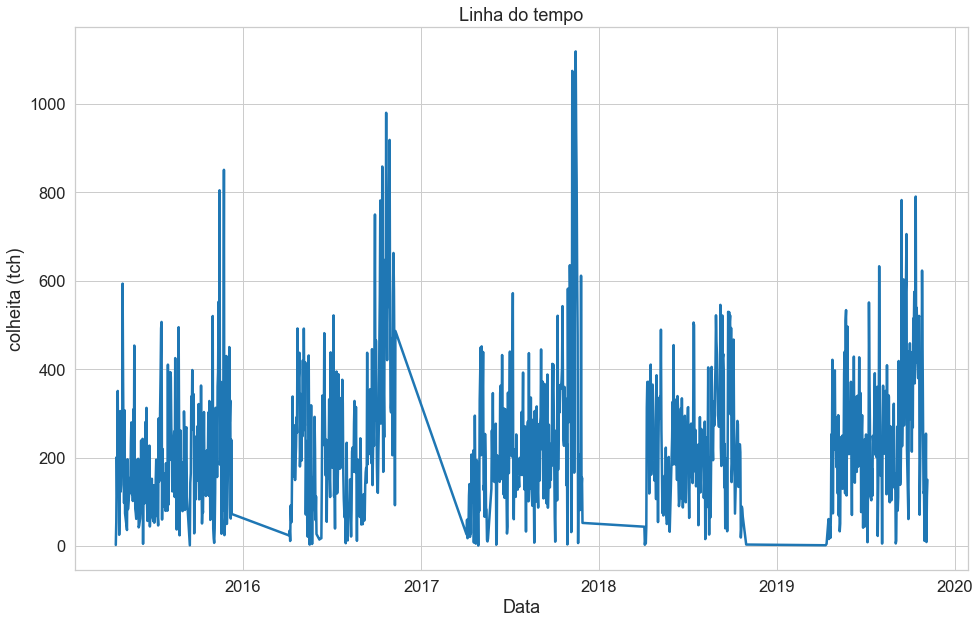

In [529]:
safra_dia = treino.groupby('data_colheita').sum()['tch_talhao']

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=safra_dia)
ax.set(xlabel='Data', ylabel = 'colheita (tch)')
ax.set_title('Linha do tempo')
#ax.set_xticks(range(safra_dia.index[0],safra_dia.index[1061],100))
plt.show()

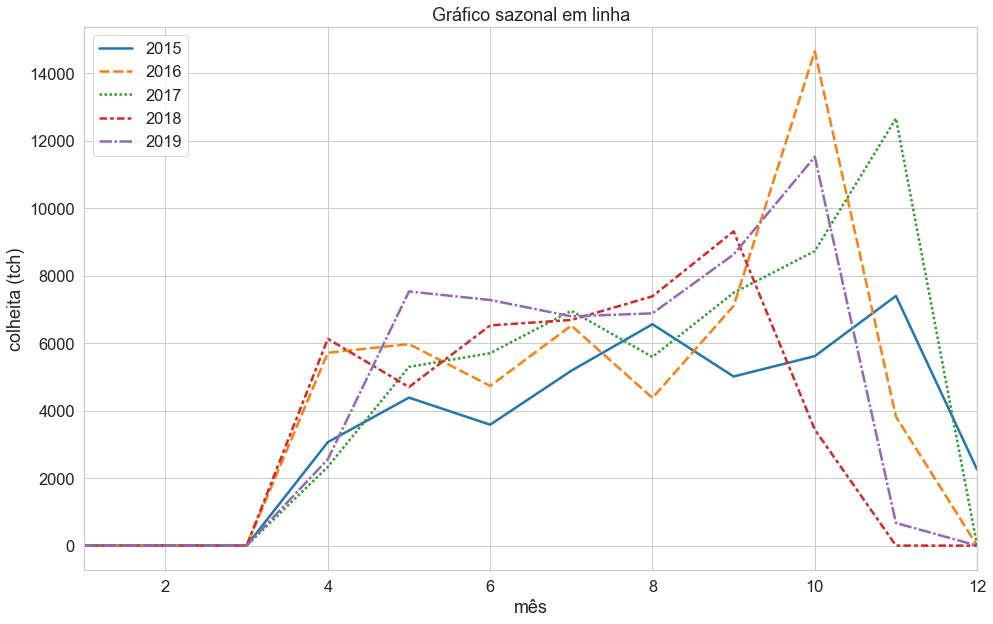

In [261]:
safra_sazonal = safra_dia.to_frame().reset_index()
safra_sazonal['ano'] = safra_sazonal['data_colheita'].dt.year
safra_sazonal['mês'] = safra_sazonal['data_colheita'].dt.month
safra_sazonal = safra_sazonal.groupby(['ano','mês'])['tch_talhao'].sum().to_frame().reset_index()

safra_sazonal_plot = pd.DataFrame(columns=safra_sazonal['mês'].unique(),index = safra_sazonal['ano'].unique())

for i in safra_sazonal_plot.index:
    for j in range(0,13):
        if j in safra_sazonal[safra_sazonal.ano == i]['mês'].array:
            safra_sazonal_plot.loc[i,j] = safra_sazonal[(safra_sazonal.ano ==i) & (safra_sazonal.mês == j)]['tch_talhao'].sum()
        else: safra_sazonal_plot.loc[i,j] = 0

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=safra_sazonal_plot.astype(float).T)
ax.set(xlabel='mês', ylabel = 'colheita (tch)')
ax.set_title('Gráfico sazonal em linha')
ax.set_xlim(1,12)
plt.show()

In [254]:
import plotly.graph_objects as go


categories = list(safra_sazonal_plot.columns)
categories = [*categories, categories[0]]
categories = [str(i) for i in categories]

ano_1 = list(safra_sazonal_plot.iloc[0,:])
ano_2 = list(safra_sazonal_plot.iloc[1,:])
ano_3 = list(safra_sazonal_plot.iloc[2,:])
ano_4 = list(safra_sazonal_plot.iloc[3,:])
ano_5 = list(safra_sazonal_plot.iloc[4,:])

ano_1 = [*ano_1, ano_1[0]]
ano_2 = [*ano_2, ano_2[0]]
ano_3 = [*ano_3, ano_3[0]]
ano_4 = [*ano_4, ano_2[0]]
ano_5 = [*ano_5, ano_3[0]]

fig = go.Figure(
    data=[
        go.Scatterpolar(r=ano_1, theta=categories, name='2015'),
        go.Scatterpolar(r=ano_2, theta=categories, name='2016'),
        go.Scatterpolar(r=ano_3, theta=categories, name='2017'),
        go.Scatterpolar(r=ano_4, theta=categories, name='2018'),
        go.Scatterpolar(r=ano_5, theta=categories, name='2019')
    ],
    layout=go.Layout(
       title=go.layout.Title(text='Gráfico sazonal polar'),
        polar={'radialaxis': {'visible': True},'bgcolor':'PapayaWhip'},
        showlegend=True,
        width=750,
        height=750,
        font=dict(
        size=18,
        )
    )
)

fig.show()

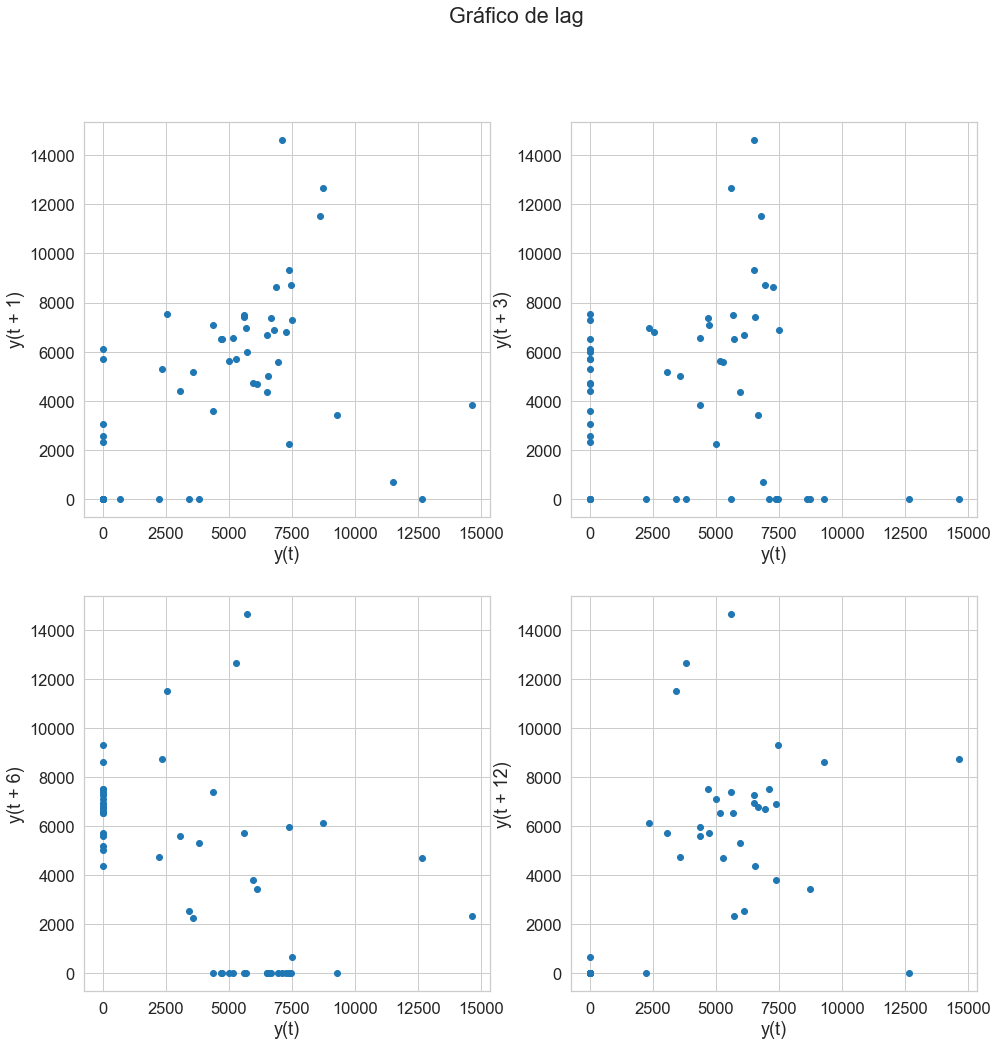

In [317]:
safra_sazonal_lagplot = pd.DataFrame(columns=['tch_talhao'],index = np.arange(1,12*5+1))

index = 0
for i in safra_sazonal.ano.unique():
    for j in range(1,13):
        if j in safra_sazonal[safra_sazonal.ano == i]['mês'].array:
            safra_sazonal_lagplot.iloc[index,0] = safra_sazonal[(safra_sazonal.ano ==i) & (safra_sazonal.mês == j)]['tch_talhao'].sum()
        else:
            safra_sazonal_lagplot.iloc[index,0] = 0
        index = index + 1

fig_lag = plt.figure(figsize=(16, 16))
fig_lag.suptitle('Gráfico de lag')
plt.subplot(221)
pd.plotting.lag_plot(safra_sazonal_lagplot['tch_talhao'], lag= 1)
plt.subplot(222)
pd.plotting.lag_plot(safra_sazonal_lagplot['tch_talhao'], lag= 3)
plt.subplot(223)
pd.plotting.lag_plot(safra_sazonal_lagplot['tch_talhao'], lag= 6)
plt.subplot(224)
pd.plotting.lag_plot(safra_sazonal_lagplot['tch_talhao'], lag= 12)
plt.show()

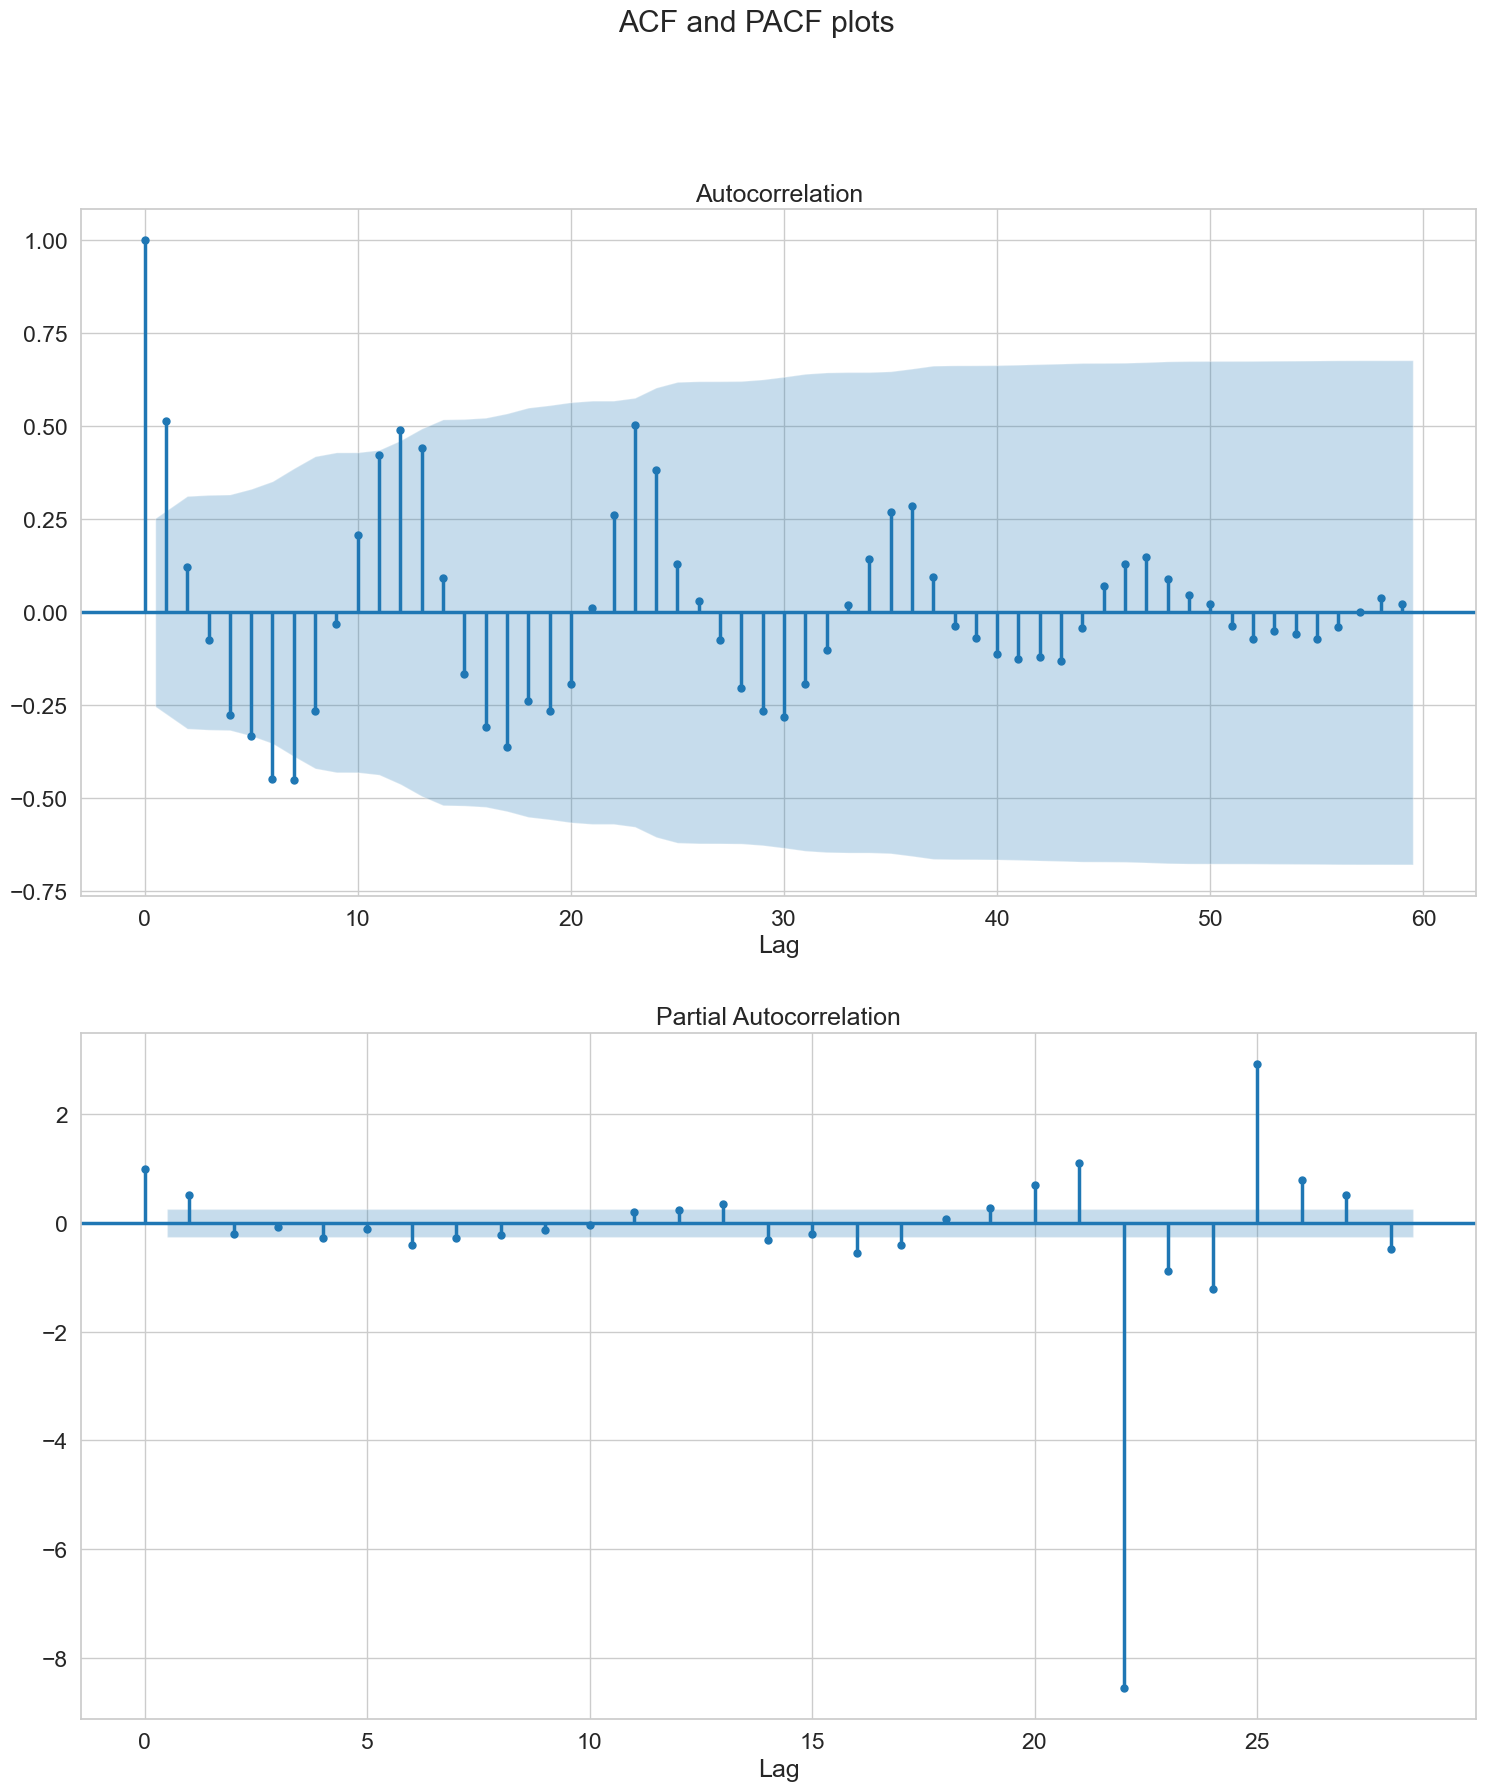

In [461]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig_auto, axes = plt.subplots(2,1,figsize=(18,20), dpi= 100)
fig_auto.suptitle('ACF and PACF plots')
plot_acf(safra_sazonal_lagplot['tch_talhao'], lags=59, ax=axes[0])
axes[0].set_xlabel('Lag')
plot_pacf(safra_sazonal_lagplot['tch_talhao'], lags=28, ax=axes[1])
axes[1].set_xlabel('Lag')
'''plot_acf(safra_dia, lags=50, ax=axes[2])
axes[2].set_xlabel('Lag')
plot_pacf(safra_dia, lags=50, ax=axes[3])
axes[3].set_xlabel('Lag')'''
plt.show()

----

Por fim, apenas para confirmar numericamente o que foi observados nos gráficos, podemos utilizar alguns testes para verificar se os dados tem mesmo sazonalidade.

Neste caso, usaremos dois testes: 

1. Augmented Dickey Fuller test (ADH)
2. Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

No teste ADF, a hipótese nula é que a série temporal possui raiz unitária e não é estacionária. Portanto, se o valor p for menor que o nível de significância (p < 0,05), você rejeita a hipótese nula.

O teste KPSS, por outro lado, é usado para testar a estacionariedade da tendência. A hipótese nula e a interpretação do valor p são exatamente o oposto do teste de ADH. Portanto, a série temporal é estacionária se a hipótese nula for válida (p > 0,05). 

Vemos que o resultados dos dois testes mostram que a série é não-estacionária.

-----

In [357]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(safra_sazonal_lagplot['tch_talhao'], autolag='AIC',maxlag=24)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(safra_sazonal_lagplot['tch_talhao'], regression='c',nlags =59)
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
warnings.filterwarnings("ignore")

ADF Statistic: -0.9513483380684354
p-value: 0.7705929837828192
Critial Values:
   1%, -3.6327426647230316
Critial Values:
   5%, -2.9485102040816327
Critial Values:
   10%, -2.6130173469387756

KPSS Statistic: 0.500000
p-value: 0.041667
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


-----

### Construção do modelo

O padrão sazonal dos nossos dados, nos dá duas opções. A primeira é decompor a série temporal para removermos a sazonalidade dos dados e, assim, podermos utilizar modelos que não são capazes de lidar com a sazonalidade. **A segunda opção, que adotaremos nesse projeto, é utilizar modelos que são capazes de tratar a sazonalidade diretamente**. 

Therefore, we can now try the Seasonal Autoregressive Integrated Moving Average (SARIMA) method, also called Seasonal ARIMA. It is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component. A seasonal ARIMA model is formed by including additional seasonal terms in the ARIMA models. It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality. The modelling procedure is almost the same as for non-seasonal data, except that we need to select seasonal AR and MA terms as well as the non-seasonal components of the model.

In [436]:
from sklearn.impute import KNNImputer

model = KNNImputer()
imputer = model.fit_transform(treino[['NDVI_b01', 'NDVI_b02', 'NDVI_b03', 'NDVI_b04', 'NDVI_b05', 'NDVI_b06',
       'NDVI_b07', 'NDVI_b08', 'NDVI_b09', 'NDVI_b10', 'NDVI_b11', 'NDVI_b12',
       'tch_talhao']])

In [440]:
treino_im = treino.copy()
treino_im[['NDVI_b01', 'NDVI_b02', 'NDVI_b03', 'NDVI_b04', 'NDVI_b05', 'NDVI_b06',
       'NDVI_b07', 'NDVI_b08', 'NDVI_b09', 'NDVI_b10', 'NDVI_b11', 'NDVI_b12',
       'tch_talhao']] = imputer
treino_im.head()

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12,tch_talhao
0,1239,1,2015,15.53,2015-10-25,75.88,0.622972,0.639532,0.712402,0.693089,0.743105,0.805768,0.711357,0.767734,0.650449,0.486471,0.241302,0.418311,42.742706
1,1243,1,2015,13.69,2015-07-14,65.22,0.677335,0.517030,0.651432,0.685661,0.721786,0.641068,0.583574,0.337117,0.323262,0.289830,0.279747,0.262570,17.900196
2,1243,2,2015,4.63,2015-07-15,65.22,0.632256,0.724826,0.736531,0.560717,0.682829,0.582140,0.406883,0.317600,0.298278,0.291357,0.353494,0.424133,6.053901
3,1243,7,2015,4.95,2015-07-16,65.22,0.570271,0.463221,0.702480,0.590163,0.664030,0.602534,0.557671,0.386727,0.321662,0.360142,0.348740,0.402827,6.472314
4,1244,4,2015,8.66,2015-05-13,96.91,0.709576,0.454723,0.734945,0.722006,0.731116,0.494456,0.401426,0.364672,0.367147,0.387163,0.452122,0.516717,40.484351


In [364]:
safra_dia

data_colheita
2015-04-15      2.418994
2015-04-16     52.969138
2015-04-17    201.332132
2015-04-18    115.240653
2015-04-19    350.638248
                 ...    
2019-11-02    121.422946
2019-11-03    254.015229
2019-11-04      8.908845
2019-11-05    112.205636
2019-11-06    149.584724
Name: tch_talhao, Length: 1062, dtype: float64

In [429]:
teste[teste['data_colheita']=='2020-03-31']

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
16967,1659,6,2020,NaN,2020-03-31,100.2,0.731908,NaN,0.656486,NaN,0.440373,0.320107,0.319912,0.301708,0.310685,NaN,NaN,NaN
17244,1839,1,2020,NaN,2020-03-31,55.2,NaN,0.375374,0.399656,0.467841,0.464954,0.550803,0.615105,0.669241,0.770803,NaN,NaN,NaN


In [431]:
teste.groupby('data_colheita').sum()['tch_bloco']

data_colheita
2020-03-31     155.4
2020-04-06     250.0
2020-04-07     437.5
2020-04-08     458.1
2020-04-09     452.6
               ...  
2020-11-09    1472.3
2020-11-10    1429.1
2020-11-11    1361.0
2020-11-12    1555.1
2020-11-13    3293.5
Name: tch_bloco, Length: 219, dtype: float64

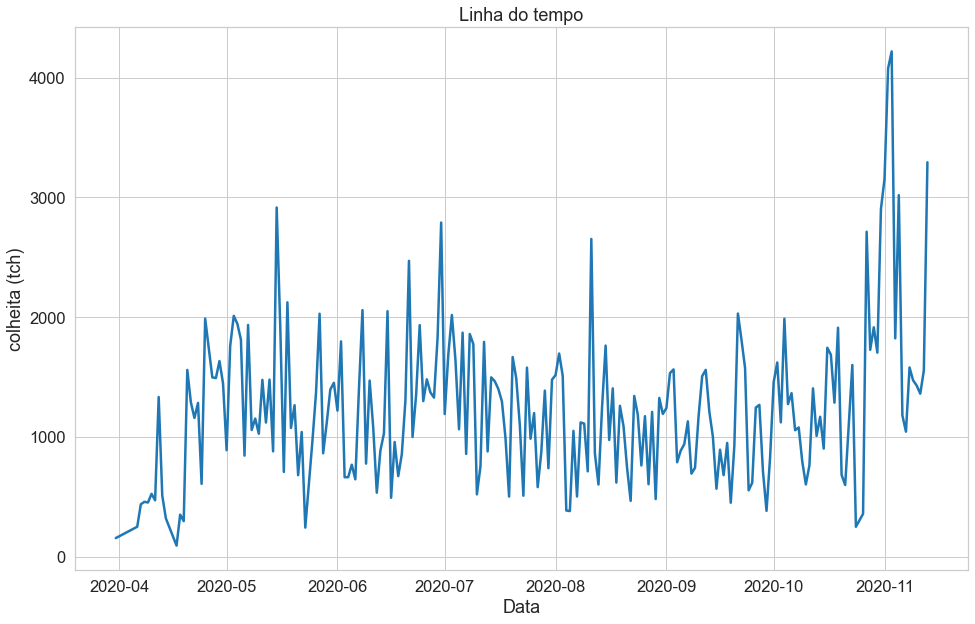

In [432]:
safra_dia_teste = teste.groupby('data_colheita').sum()['tch_bloco']

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=safra_dia_teste)
ax.set(xlabel='Data', ylabel = 'colheita (tch)')
ax.set_title('Linha do tempo')
#ax.set_xticks(range(safra_dia.index[0],safra_dia.index[1061],100))
plt.show()

In [392]:
treino.sort_values('data_colheita').head()

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12,tch_talhao
515,1756,4,2015,4.36,2015-04-15,88.26,0.582533,0.661258,0.652888,0.517523,0.401414,0.459811,0.449367,0.369002,0.349467,0.343333,0.276701,NaN,2.418994
1437,4356,6,2015,4.31,2015-04-16,76.04,0.717476,0.719646,0.726366,NaN,NaN,0.548521,0.509174,0.480132,0.450086,0.437580,0.374354,NaN,6.048955
1353,3251,5,2015,10.95,2015-04-16,92.19,0.748275,0.763608,0.765614,NaN,0.522795,0.563054,0.360206,0.344546,0.287763,0.354484,0.402642,NaN,4.700505
734,4356,5,2015,6.54,2015-04-16,76.04,0.707744,0.729108,0.744549,NaN,NaN,0.593485,0.553897,0.535361,0.516200,0.490128,0.411097,NaN,9.178693
2273,1756,5,2015,7.07,2015-04-16,88.26,0.601601,0.776152,0.745867,0.531864,NaN,0.512990,0.536167,0.427721,0.439707,0.406794,0.282912,NaN,3.922543


In [401]:
teste.head()

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
16330,1236,1,2020,NaN,2020-10-04,51.9,0.384249,NaN,0.479729,0.564533,0.629845,0.717385,0.729278,NaN,0.660739,NaN,0.460468,0.383685
16331,1236,2,2020,NaN,2020-11-05,51.9,0.167690,0.357762,0.373363,0.407766,0.482634,0.481337,0.547575,0.539551,0.591749,0.538537,NaN,0.381633
16332,1237,1,2020,NaN,2020-05-18,115.1,0.716689,0.736573,0.778545,0.767933,0.623381,0.460789,0.575446,0.534166,0.548278,NaN,0.537710,0.530076
16333,1238,1,2020,NaN,2020-11-05,49.0,0.409159,0.414752,NaN,0.505930,0.590844,0.612857,0.699119,0.629700,NaN,0.476244,NaN,0.271041
16334,1238,2,2020,NaN,2020-11-03,49.0,0.455554,0.447946,NaN,0.547397,0.620328,0.633879,0.729850,0.694389,NaN,0.601688,NaN,0.271332


In [402]:
treino.drop('tch_talhao',axis=1).sort_values('data_colheita')[['bloco','talhao','NDVI_b01', 'NDVI_b02', 'NDVI_b03', 'NDVI_b04', 'NDVI_b05', 'NDVI_b06',
       'NDVI_b07', 'NDVI_b08', 'NDVI_b09', 'NDVI_b10', 'NDVI_b11', 'NDVI_b12']]

,bloco,talhao,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
515,1756,4,0.582533,0.661258,0.652888,0.517523,0.401414,0.459811,0.449367,0.369002,0.349467,0.343333,0.276701,NaN
1437,4356,6,0.717476,0.719646,0.726366,NaN,NaN,0.548521,0.509174,0.480132,0.450086,0.437580,0.374354,NaN
1353,3251,5,0.748275,0.763608,0.765614,NaN,0.522795,0.563054,0.360206,0.344546,0.287763,0.354484,0.402642,NaN
734,4356,5,0.707744,0.729108,0.744549,NaN,NaN,0.593485,0.553897,0.535361,0.516200,0.490128,0.411097,NaN
2273,1756,5,0.601601,0.776152,0.745867,0.531864,NaN,0.512990,0.536167,0.427721,0.439707,0.406794,0.282912,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15447,4245,5,0.529063,0.413997,0.449373,0.498944,0.651194,0.752559,0.784192,0.811126,0.754837,0.737253,0.691592,0.487085
15438,3684,1,0.503235,0.450065,0.441852,0.451324,0.574824,0.660487,0.694665,0.668102,0.680381,0.542424,0.534970,0.416326
16255,4245,1,0.390204,0.405120,0.450124,0.479680,0.610317,0.712156,0.736004,0.750156,0.766297,0.673814,0.624161,0.433396
13800,4245,8,0.528389,0.436712,0.448964,0.509258,0.654693,0.746990,0.780223,0.802747,0.656771,0.743062,0.697178,0.487815


In [441]:
treino.head()

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12,tch_talhao
0,1239,1,2015,15.53,2015-10-25,75.88,0.622972,0.639532,0.712402,0.693089,0.743105,0.805768,0.711357,0.767734,0.650449,0.486471,0.241302,0.418311,42.742706
1,1243,1,2015,13.69,2015-07-14,65.22,0.677335,0.517030,0.651432,0.685661,0.721786,0.641068,0.583574,0.337117,0.323262,0.289830,0.279747,0.262570,17.900196
2,1243,2,2015,4.63,2015-07-15,65.22,0.632256,0.724826,0.736531,0.560717,0.682829,0.582140,0.406883,0.317600,0.298278,0.291357,0.353494,0.424133,6.053901
3,1243,7,2015,4.95,2015-07-16,65.22,0.570271,0.463221,0.702480,0.590163,0.664030,0.602534,0.557671,0.386727,0.321662,0.360142,0.348740,0.402827,6.472314
4,1244,4,2015,8.66,2015-05-13,96.91,0.709576,0.454723,0.734945,0.722006,0.731116,0.494456,0.401426,0.364672,0.367147,0.387163,0.452122,0.516717,40.484351


In [443]:
exog = treino_im.sort_values('data_colheita').drop(['safra','area','data_colheita','tch_bloco','tch_talhao'],axis=1)

mod = sm.tsa.statespace.SARIMAX(treino_im.sort_values('data_colheita')['tch_talhao'],
                                exog=exog,
                                order=(3, 1, 3),
                                seasonal_order=(2, 1, 3, 12))
res_SARIMAX = mod.fit()
print(res_SARIMAX.summary().tables[1])

KeyboardInterrupt: 

In [ ]:
teste.head()

In [416]:
yhat_SARIMAX = res_SARIMAX.forecast(teste.sort_values('data_colheita')[['data_colheita']].to_numpy())

KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

In [406]:
exog_teste = teste.sort_values('data_colheita')[['bloco','talhao']]

yhat_SARIMAX = res_SARIMAX.predict(start=len(treino)+1,end=len(teste)+len(treino)+1,exog = exog_teste)
yhat_SARIMAX

ValueError: Out-of-sample operations in a model with a regression component require additional exogenous values via the `exog` argument.

In [ ]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=yhat_SARIMAX,color = 'green')
bx = sns.lineplot(data=safra_dia.squeeze())
cx = sns.lineplot(data=test_sar.squeeze())
ax.set(xlabel='Month', ylabel = 'Sunspots')
ax.set_title('SARIMAX model forecast')
ax.set_xlim('1749-01-01','1984-01-01')
#ax.set_ylim(-50,300)

fcast = res_SARIMAX.get_prediction(start=len(train_sar)+1, end=(len(df_sar)), dynamic=False).summary_frame()
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);

plt.legend(labels=["Model forecast (3, 1, 3)(2, 1, 3)11", "Train data", "Test data"])
plt.show()

In [ ]:
df[df.bloco==2752]

In [ ]:
a = df.groupby(['bloco','talhao','safra']).sum()['area'].to_frame().reset_index()
a[:100]

In [ ]:
b = df.groupby(['bloco','safra']).sum()['area'].to_frame().reset_index()
b

In [ ]:
b

In [ ]:
b.iloc[1]

In [ ]:
j=0
c=pd.DataFrame(columns=['bloco', 'safra', 'area', 'diff'])
for i in range(len(b))[1:]:
    if ((b.iloc[i,0] == b.iloc[i-1,0])&
    (b.iloc[i,1] != 2020)&
    (b.iloc[i,2] != b.iloc[i-1,2])):
        j=j+1
        f = (b.iloc[i,2]-b.iloc[i-1,2])/b.iloc[i-1,2]
        f1 = pd.Series([f],index=['diff'])
        d1 = b.iloc[i].append(f1)
        d2 = b.iloc[i-1].append(f1)
        c = c.append(d1,ignore_index=True)
        c = c.append(d2,ignore_index=True)
        #print(b.iloc[i])
print(j) 

In [ ]:
c.drop_duplicates()

In [ ]:
c[c['diff'] == c['diff'].max()]

In [ ]:
b.iloc[2899:2906,:]

In [ ]:
j=0
for i in range(len(a))[1:]:
    if ((a.iloc[i,0] == a.iloc[i-1,0])&
    (a.iloc[i,1] == a.iloc[i-1,1])&
    (a.iloc[i,3] != a.iloc[i-1,3])):
        j=j+1
        print(i)
print(j)        

In [ ]:
a[(a['bloco'] == 2495) & (a['safra']==2019)]['area'].sum()

In [ ]:
a[a['bloco'] == 2495]

In [ ]:
a[a.index==10211]

### Divisão em dados de treino e de teste

Como estamos trabalhando com séries temporais, vamos fazer a divisão considerando a progressão temporal. Nosso dataset começa na safra de 2015 e vai até a safra de 2020. Então vamos separar os dados do ano de 2020 como nossos dados de teste e os demais anos como dados de treino.

In [ ]:
print(f'primeira safra: {df.safra.min()}, última safra: {df.safra.max()}')

In [ ]:
train = df[df['safra']!=2020]
test = df[df['safra']==2020]

### Preparação dos dados

In [ ]:
train.head()

Antes de começar, precisamos preparar o dataset para nossas análises. 

In [ ]:
train.isnull().sum()

In [ ]:
test.info()

In [ ]:
from sklearn.impute import KNNImputer



In [ ]:
df[(df.data_colheita.isnull()==True)&(df.tch_bloco!=np.nan)]

In [ ]:
pd.set_option('display.max_rows', 115)
#array([ 4, 14, 20, 32, 12, 21, 30,  6,  3,  9, 19, 23,  1, 11, 16,  2, 13,
#       17,  7, 10, 24, 26, 27,  5,  8, 29, 31, 33, 15, 18, 22, 25, 28])
df[(df.bloco==4266) & (df.data_colheita.dt.year>=2019)]

------

---------

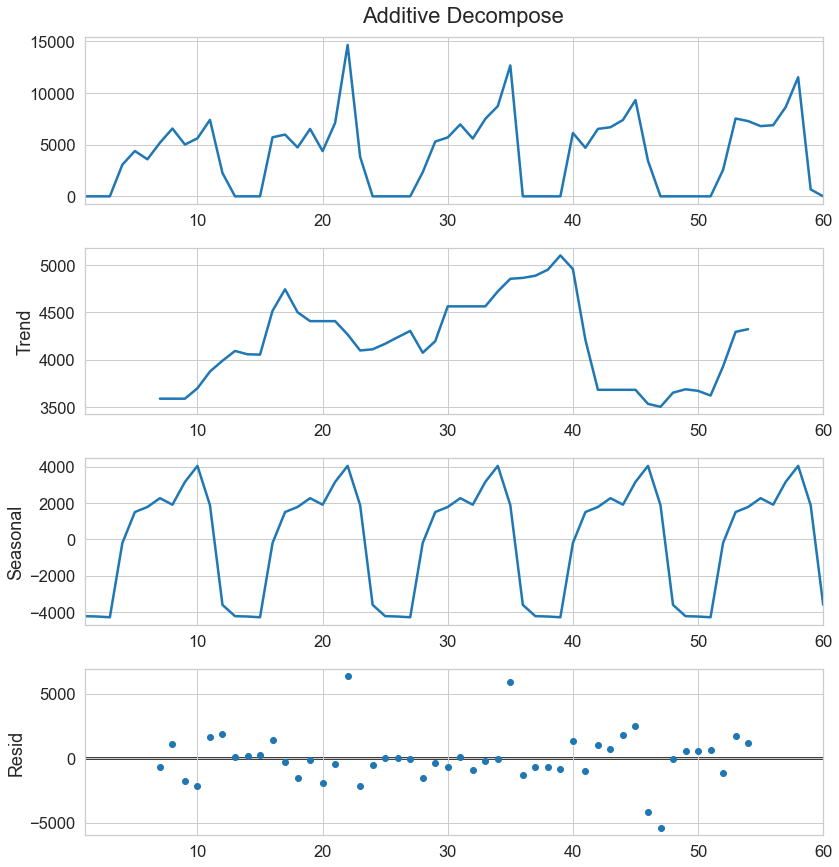

In [543]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decomposition is  Additive
additive = seasonal_decompose(safra_sazonal_lagplot, model='additive',period=12)
#multiplicative = seasonal_decompose(safra_dia, model='multiplicative',period=30)
# Plotting
plt.rcParams.update({'figure.figsize': (12,12)})
#multiplicative.plot().suptitle('Multiplicative Decompose', x=0.55,y=1.01,fontsize=22)
additive.plot().suptitle('Additive Decompose', x=0.55,y=1.01, fontsize=22)
plt.show()

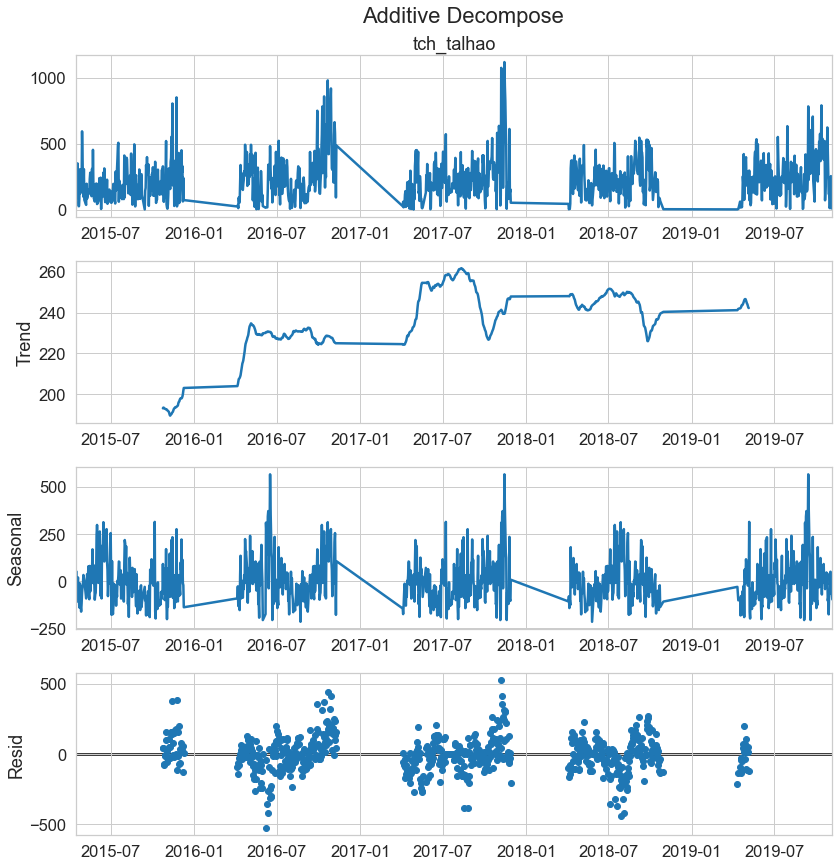

In [544]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decomposition is  Additive
additive = seasonal_decompose(safra_dia, model='additive',period=360)
#multiplicative = seasonal_decompose(safra_dia, model='multiplicative',period=30)
# Plotting
plt.rcParams.update({'figure.figsize': (12,12)})
#multiplicative.plot().suptitle('Multiplicative Decompose', x=0.55,y=1.01,fontsize=22)
additive.plot().suptitle('Additive Decompose', x=0.55,y=1.01, fontsize=22)
plt.show()

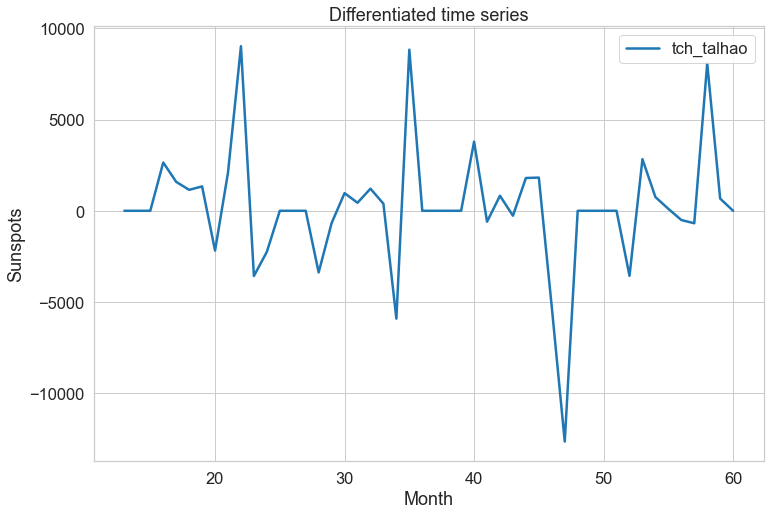

In [545]:
safra_dia_diff = safra_sazonal_lagplot.copy()

safra_dia_diff = safra_dia_diff - safra_dia_diff.shift(12)
safra_dia_diff.dropna(inplace=True)

ax = safra_dia_diff.plot(figsize=(12,8))
ax.set(xlabel='Month', ylabel = 'Sunspots')
ax.set_title('Differentiated time series')
plt.show()

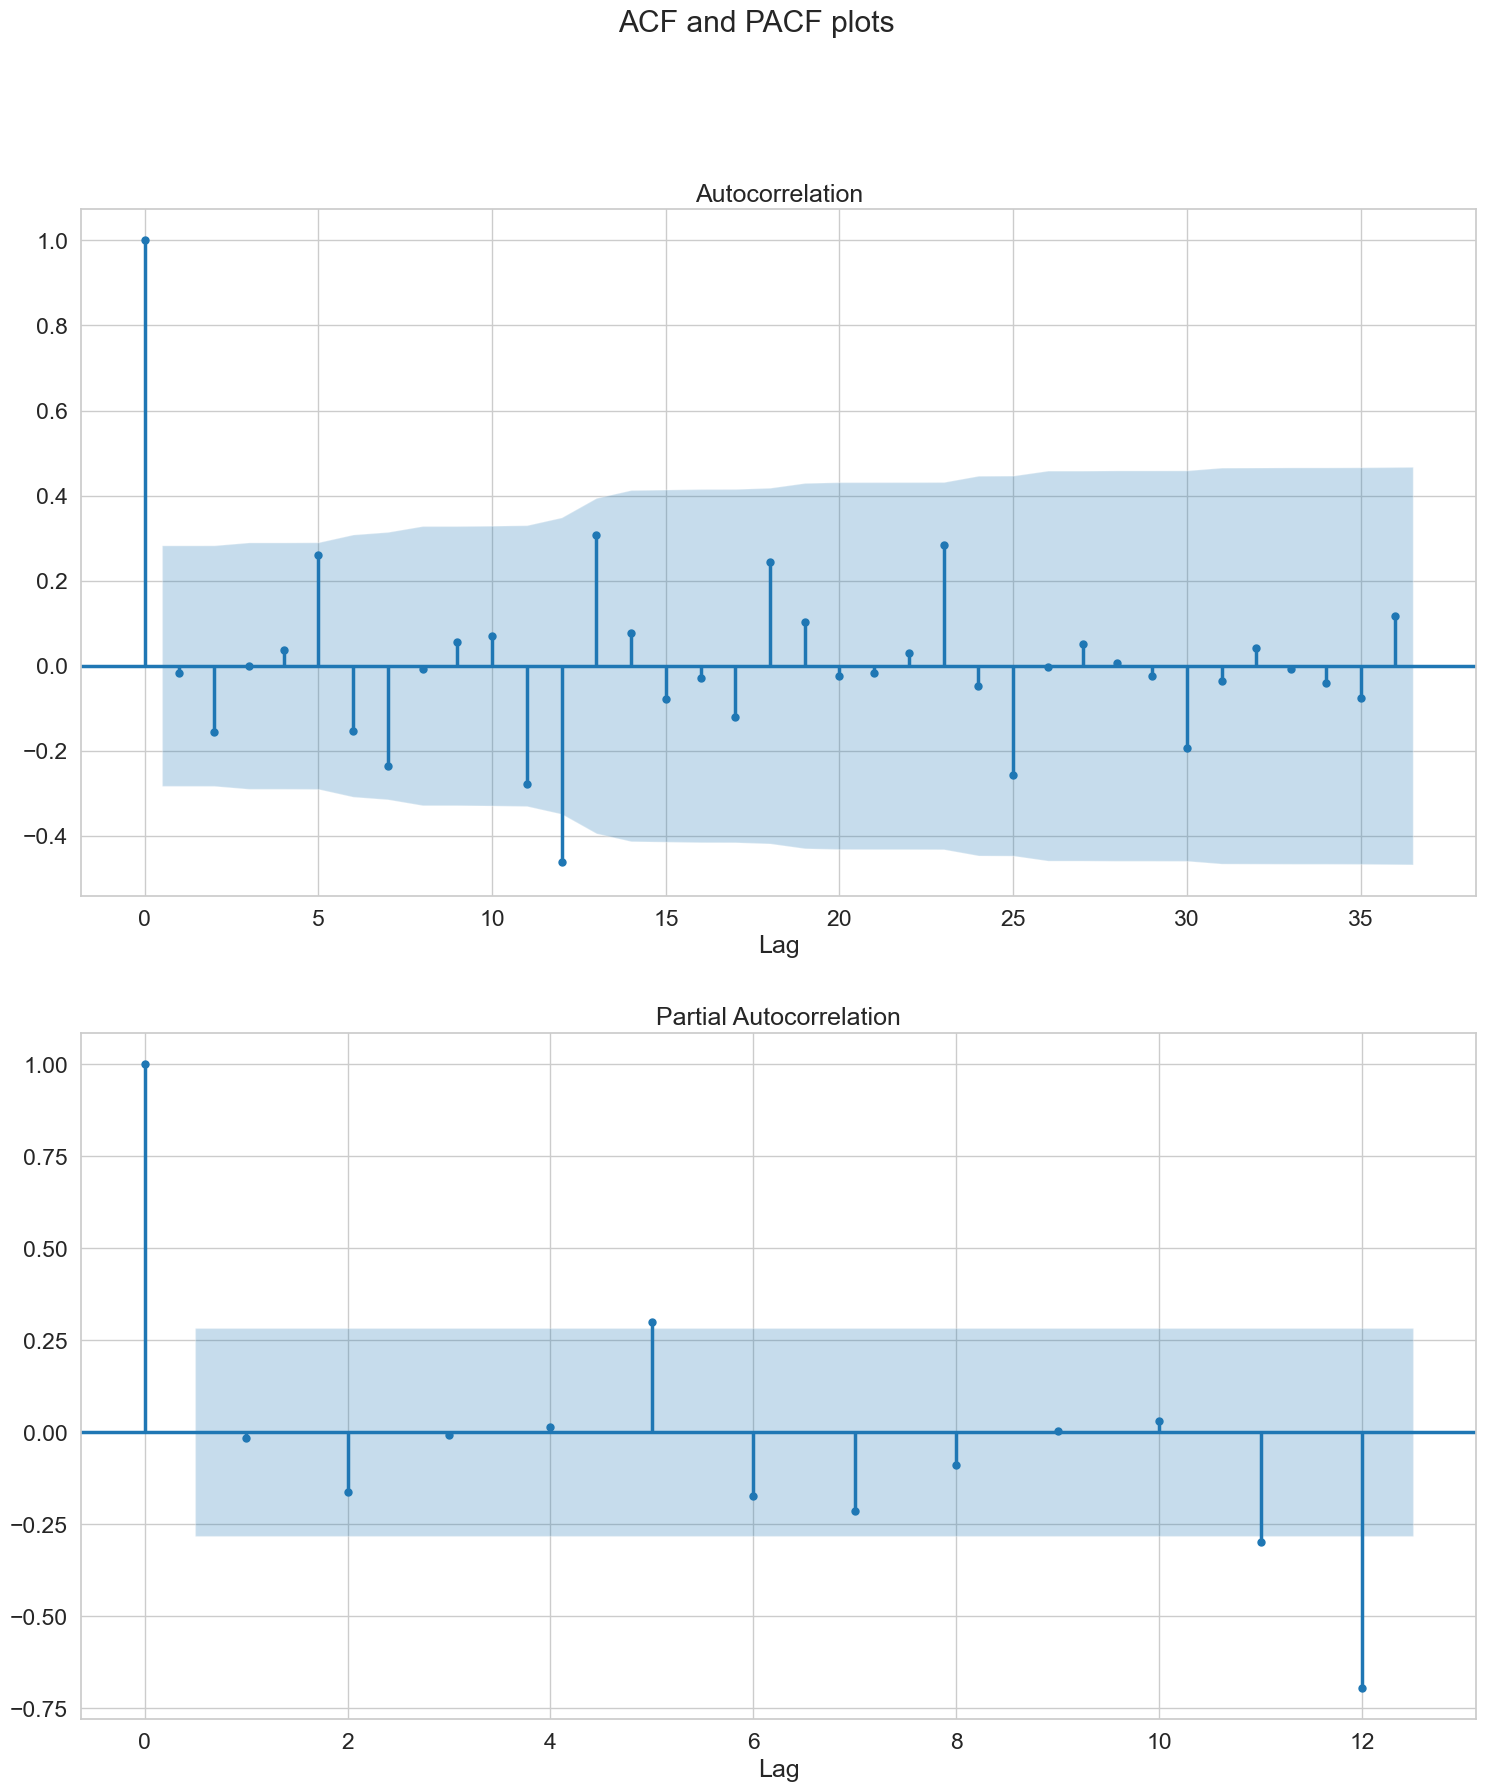

In [546]:
fig_auto, axes = plt.subplots(2,1,figsize=(18,20), dpi= 100)
fig_auto.suptitle('ACF and PACF plots')
plot_acf(safra_dia_diff['tch_talhao'], lags=36, ax=axes[0])
axes[0].set_xlabel('Lag')
plot_pacf(safra_dia_diff['tch_talhao'], lags=12, ax=axes[1])
axes[1].set_xlabel('Lag')
'''plot_acf(safra_dia, lags=50, ax=axes[2])
axes[2].set_xlabel('Lag')
plot_pacf(safra_dia, lags=50, ax=axes[3])
axes[3].set_xlabel('Lag')'''
plt.show()

------

In [547]:
df.head()

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
0,1239,1,2015,15.53,2015-10-25,75.88,0.622972,NaN,0.712402,0.693089,0.743105,0.805768,0.711357,0.767734,0.650449,NaN,0.241302,NaN
1,1243,1,2015,13.69,2015-07-14,65.22,0.677335,NaN,0.651432,NaN,0.721786,0.641068,NaN,0.337117,0.323262,0.289830,0.279747,0.262570
2,1243,2,2015,4.63,2015-07-15,65.22,0.632256,NaN,0.736531,0.560717,0.682829,0.582140,NaN,0.317600,0.298278,NaN,NaN,NaN
3,1243,7,2015,4.95,2015-07-16,65.22,0.570271,0.463221,0.702480,0.590163,0.664030,0.602534,NaN,0.386727,0.321662,NaN,NaN,NaN
4,1244,4,2015,8.66,2015-05-13,96.91,0.709576,0.454723,0.734945,0.722006,NaN,0.494456,0.401426,0.364672,0.367147,0.387163,0.452122,0.516717


In [566]:
df[df['bloco']<2000]['bloco'].sort_values().unique()

array([1236, 1237, 1238, 1239, 1240, 1242, 1243, 1244, 1247, 1248, 1250,
       1251, 1252, 1254, 1256, 1257, 1258, 1261, 1262, 1264, 1265, 1266,
       1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278,
       1291, 1292, 1293, 1294, 1295, 1296, 1297, 1300, 1301, 1302, 1304,
       1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318,
       1320, 1321, 1322, 1338, 1341, 1343, 1344, 1345, 1346, 1347, 1348,
       1349, 1350, 1351, 1352, 1353, 1355, 1356, 1357, 1360, 1361, 1364,
       1365, 1366, 1367, 1368, 1370, 1373, 1374, 1375, 1376, 1377, 1379,
       1380, 1382, 1384, 1385, 1388, 1389, 1390, 1391, 1393, 1396, 1397,
       1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409,
       1410, 1411, 1412, 1413, 1416, 1417, 1418, 1419, 1420, 1421, 1422,
       1423, 1424, 1425, 1426, 1427, 1428, 1436, 1437, 1438, 1439, 1441,
       1442, 1444, 1445, 1447, 1449, 1450, 1451, 1454, 1455, 1456, 1457,
       1536, 1552, 1558, 1562, 1567, 1568, 1569, 15

In [683]:
area_bloco_ = df.groupby(['bloco','safra']).sum()['area']
area_bloco_.to_frame()

area
bloco safra        
1236  2016     9.85
      2017     9.85
      2018     9.64
      2019     9.85
      2020     0.00
...             ...
4736  2016   169.28
4738  2015    67.51
      2016    67.51
4739  2015    33.66
      2016    33.66

[3990 rows x 1 columns]

In [685]:
tch_bloco_ = df.groupby(['bloco','safra']).sum()['tch_bloco']/df.groupby(['bloco','safra']).count()['tch_bloco']
a = tch_bloco_.to_frame().join(area_bloco_).reset_index()
a[a['bloco']==1779]

,bloco,safra,tch_bloco,area
1040,1779,2015,98.35,60.91
1041,1779,2016,87.06,60.91
1042,1779,2017,54.16,41.11
1043,1779,2018,43.58,60.91
1044,1779,2020,124.90,0.00


In [686]:
df[df['bloco']==1779]

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
866,1779,1,2015,9.42,2015-10-28,98.35,0.560984,0.549248,0.527118,0.493364,0.515742,NaN,0.751076,0.712069,0.793874,0.728661,0.529428,0.587172
867,1779,5,2015,11.39,2015-05-10,98.35,0.732081,0.722922,0.769501,0.722180,NaN,0.486974,0.501060,0.506878,0.376185,0.436731,0.376668,0.347273
1229,1779,2,2015,6.36,2015-05-10,98.35,0.728616,0.703583,0.781583,0.713989,0.538088,NaN,0.554459,0.537928,0.464226,0.458053,0.407653,0.394650
1230,1779,3,2015,5.10,2015-05-13,98.35,0.750477,0.700363,0.797516,0.725518,NaN,0.575869,0.536101,0.562838,0.492235,0.483451,0.411722,0.401427
1233,1779,6,2015,14.28,2015-10-29,98.35,0.507970,0.499044,0.464980,0.420311,0.413458,NaN,0.746588,0.726696,0.785070,0.728224,0.489549,0.512631
1547,1779,4,2015,5.91,2015-05-10,98.35,0.751492,0.724616,0.798845,0.731878,NaN,0.540434,0.550010,0.535872,0.458109,0.450960,0.384304,0.364475
2284,1779,7,2015,8.45,2015-10-29,98.35,0.536935,0.546113,0.538088,0.511579,0.529057,NaN,0.755214,0.727090,0.792416,0.723886,0.474800,0.569939
3917,1779,1,2016,9.42,2016-09-21,87.06,0.550138,0.620685,0.692204,0.503712,0.664559,0.706223,NaN,0.707271,NaN,NaN,NaN,NaN
3919,1779,5,2016,11.39,2016-09-21,87.06,0.515596,0.592109,0.688894,0.494001,0.671260,0.733061,NaN,0.607947,NaN,NaN,0.502666,0.572887
4345,1779,2,2016,6.36,2016-09-20,87.06,0.513934,0.594863,0.636516,0.476840,0.620598,0.641057,NaN,0.418208,NaN,NaN,0.486120,0.581988


In [613]:
df.isnull().sum()

bloco               0
talhao              0
safra               0
area             3425
data_colheita       0
tch_bloco           0
NDVI_b01          897
NDVI_b02         1024
NDVI_b03         1554
NDVI_b04         2366
NDVI_b05         3558
NDVI_b06         3431
NDVI_b07         3532
NDVI_b08         4069
NDVI_b09         4730
NDVI_b10         5190
NDVI_b11         6814
NDVI_b12         8184
dtype: int64

In [672]:
import datetime as dt
df_t = df.copy()
df_t['data_colheita'] = df_t['data_colheita'].map(dt.datetime.toordinal)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
df_im = imputer.fit_transform(df_t)
pd.DataFrame(df_im,columns=df_t.columns)

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
0,1239.0,1.0,2015.0,15.530000,735896.0,75.88,0.622972,0.628807,0.712402,0.693089,0.743105,0.805768,0.711357,0.767734,0.650449,0.483893,0.241302,0.238178
1,1243.0,1.0,2015.0,13.690000,735793.0,65.22,0.677335,0.660962,0.651432,0.677365,0.721786,0.641068,0.526797,0.337117,0.323262,0.289830,0.279747,0.262570
2,1243.0,2.0,2015.0,4.630000,735794.0,65.22,0.632256,0.648317,0.736531,0.560717,0.682829,0.582140,0.484986,0.317600,0.298278,0.338153,0.335040,0.362625
3,1243.0,7.0,2015.0,4.950000,735795.0,65.22,0.570271,0.463221,0.702480,0.590163,0.664030,0.602534,0.523632,0.386727,0.321662,0.350563,0.342604,0.356714
4,1244.0,4.0,2015.0,8.660000,735731.0,96.91,0.709576,0.454723,0.734945,0.722006,0.608769,0.494456,0.401426,0.364672,0.367147,0.387163,0.452122,0.516717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19750,4708.0,1.0,2020.0,12.881640,737577.0,126.90,0.701219,0.785596,0.785964,0.783466,0.785038,0.685335,0.615206,0.451419,0.438878,0.437908,0.485190,0.655308
19751,4708.0,2.0,2020.0,12.699348,737576.0,126.90,0.703152,0.778086,0.779421,0.772157,0.771885,0.666120,0.588857,0.434965,0.430177,0.453576,0.589941,0.678126
19752,4708.0,3.0,2020.0,12.365129,737574.0,126.90,0.764153,0.777951,0.769963,0.740468,0.696746,0.632893,0.578459,0.474790,0.470805,0.572272,0.638208,0.696257
19753,4709.0,1.0,2020.0,11.955643,737576.0,126.20,0.680704,0.748262,0.732310,0.735217,0.693749,0.627918,0.539828,0.444521,0.415690,0.437539,0.488487,0.633406


In [673]:
df_im = pd.DataFrame(df_im,columns=df_t.columns)

In [674]:
area_bloco_ = df_im.groupby(['bloco','safra']).sum()['area']
tch_bloco_ = df_im.groupby(['bloco','safra']).sum()['tch_bloco']/df_im.groupby(['bloco','safra']).count()['tch_bloco']
a = tch_bloco_.to_frame().join(area_bloco_).reset_index()

In [676]:
a[a['bloco']==1236]

,bloco,safra,tch_bloco,area
0,1236.0,2016.0,101.68,9.850000
1,1236.0,2017.0,86.43,9.850000
2,1236.0,2018.0,60.10,9.640000
3,1236.0,2019.0,69.18,9.850000
4,1236.0,2020.0,51.90,16.308785
